In [1]:
%matplotlib inline
from chmp.ds import reload

import base64
import io

from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

import importlib
reload('hexworld.fov', 'hexworld')
import hexworld
import hexworld.fov

from hexworld.widget import HexGame

In [2]:
center = hexworld.to_cube(hexworld.OffsetPoint(4, 3))

In [3]:
world = hexworld.Int64Buffer(21, 10)
world[center] = -1

world[5, 1] = 1
world[3, 2] = 1
world[4, 2] = 1

world[5, 3] = 1
world[3, 3] = 1
world[5, 4] = 1
world[3, 4] = 1
world[5, 5] = 1
world[3, 5] = 1

world[6, 1] = 1
world[6, 3] = 1

world[7, 0] = 1
world[7, 2] = 1

world[8, 0] = 1
world[8, 2] = 1

world[hexworld.CubePoint(4, -2, -2)] = 20

In [4]:
print(hexworld.show(world))

 ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     ___     
/ 0 \___/ 0 \___/ 20\___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___ 
\___/ 0 \___/ 0 \___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 1 \___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 1 \___/ 0 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ -1\___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 1 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/
\___/ 0 \___/ 1 \___/ 1 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/ 0 \___/   \
/ 0 \___/ 

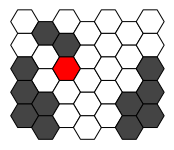

In [5]:
hexworld.plot(hexworld.fov.occlusion_maps[2, 2], colors={
    0: '#ffffff', 
    1: '#444444',
    2: '#ff0000',
})

In [7]:
view = hexworld.Int64Buffer(7, 5)
pos = center
rot = 0


def update(ev):
    global pos, rot
    
    if ev['key'] == 37:
        rot += 1
    
    if ev['key'] == 39:
        rot -= 1
    
    if ev['key'] == 38:
        pos += hexworld.rotate(hexworld.CubePoint(0, +1, -1), rot)
    
    if ev['key'] == 40:
        pos -= hexworld.rotate(hexworld.CubePoint(0, +1, -1), rot)
    
    if ev['key'] == 0:
        # TODO: run initialization tasks
        pass
    
    dir = hexworld.rotate(hexworld.CubePoint(0, +1, -1), rot)
    hexworld.extract_viewport(view, world, pos - dir, rot)
    view[view.width // 2, view.height - 2] = 2
    return dict(grid=np.asarray(view).tolist()) 


HexGame(update)

HexGame()